## Logistic Regression on L&T Finance - Loan Delinquency Data Set

#### Problem Statement

To predict __Loan Default__ based on various parameters, using __Logistic Regression__ on L&T Finance Loan dataset

#### Dataset & description

- This dataset contains various parameters for every loan sanctioned such as, Loan ID, Amount disbursed, LTV, employment type of customer, whether all documents supplied or not, length of account etc.

- Data set contains 233154 records and 41 columns in the train data set and 112393 records and 40 columns in test data set. Data description is as follows:

- UniqueID	- Loan ID
- disbursed_amount	- Total amount disbursed
- asset_cost	- Purchase cost of vehicle
- ltv	- Loan to value ration
- branch_id	- ID of the branch of loan
- supplier_id	- ID of supplier of vehicle
- manufacturer_id	- ID of manufacturer of vehicle
- Current_pincode_ID	- Pincode of borrower
- Date.of.Birth	- DOB of borrower
- Employment.Type	- Employment type of borrower
- DisbursalDate	- Date of disbursement of loan
- State_ID	- State code of borrower
- Employee_code_ID	- Employment code of borrower
- MobileNo_Avl_Flag	- Mobile present or not
- Aadhar_flag	- Aadhar present or not
- PAN_flag	- PAN present or not
- VoterID_flag	- Voter ID present or not
- Driving_flag	- Driving license present or not
- Passport_flag	- Passport present or not
- PERFORM_CNS.SCORE	- Credit score of LnT
- PERFORM_CNS.SCORE.DESCRIPTION - Description based on CNS Score
- PRI.NO.OF.ACCTS 	- Primary no. of accounts (Primary indicates accounts where customer is borrower)
- PRI.ACTIVE.ACCTS 	- Active primary accounts
- PRI.OVERDUE.ACCTS	- Overdue primary accounts
- PRI.CURRENT.BALANCE	- Balance in primary accounts
- PRI.SANCTIONED.AMOUNT	- Sanctioned amount of primary accounts
- PRI.DISBURSED.AMOUNT	- Disbursed amount in primary accounts
- SEC.NO.OF.ACCTS		- Secondary no. of accounts (Secondary indicates accounts where customer is co-applicant/guarantor)
- SEC.ACTIVE.ACCTS	- Active secondary accounts
- SEC.OVERDUE.ACCTS	- Overdue secondary accounts
- SEC.CURRENT.BALANCE	- Balance in secondary accounts
- SEC.SANCTIONED.AMOUNT	- Sanctioned amount of secondary accounts
- SEC.DISBURSED.AMOUNT	- Disbursed amount in secondary accounts
- PRIMARY.INSTAL.AMT	- Installments in primary accts.
- SEC.INSTAL.AMT		- Installments in secondary accts.
- NEW.ACCTS.IN.LAST.SIX.MONTHS	- No. of loan accounts opened in last 6 months
- DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS	- No. of delinquent loan accounts in last 6 months
- AVERAGE.ACCT.AGE	- Average age of accounts
- CREDIT.HISTORY.LENGTH	- History of credit of borrower (since first loan)
- NO.OF_INQUIRIES		- Total no. of enquiries made for loan

- All metrics are calculated at the time of application to L&T

#### Importing Packages

In [81]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime as dt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

%matplotlib inline
sns.set()

In [82]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

#### Importing L&T Finance Data

In [83]:
lntTrainData = pd.read_csv('train.csv')
lntTestData = pd.read_csv('test.csv')

In [84]:
lntData = pd.concat([lntTestData,lntTrainData],ignore_index=True)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [85]:
lntData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345546 entries, 0 to 345545
Data columns (total 41 columns):
AVERAGE.ACCT.AGE                       345546 non-null object
Aadhar_flag                            345546 non-null int64
CREDIT.HISTORY.LENGTH                  345546 non-null object
Current_pincode_ID                     345546 non-null int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    345546 non-null int64
Date.of.Birth                          345546 non-null object
DisbursalDate                          345546 non-null object
Driving_flag                           345546 non-null int64
Employee_code_ID                       345546 non-null int64
Employment.Type                        334442 non-null object
MobileNo_Avl_Flag                      345546 non-null int64
NEW.ACCTS.IN.LAST.SIX.MONTHS           345546 non-null int64
NO.OF_INQUIRIES                        345546 non-null int64
PAN_flag                               345546 non-null int64
PERFORM_CNS.SCORE             

In [86]:
lntTrainData.describe(include='all')

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,225493,233154,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154,233154,233154.000000,233154.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15433,2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192,294,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-01-88,Self employed,31-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Bureau History Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0yrs 0mon,0yrs 0mon,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2173,127635,8826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119373,119127,NaN,NaN
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,NaN,NaN,NaN,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,NaN,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,NaN,NaN,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,NaN,NaN,NaN,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,NaN,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,NaN,NaN,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,NaN,NaN,NaN,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,NaN,NaN,NaN,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,NaN,NaN,NaN,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,NaN,3.000000,1.000000,0.000000,3.500650e+04,6.

###### Inference from describe() and info()

    - Total 233154 records present, utilizing ~72 MB of memory. Out of which, NO Null values are there except Employment Type
    - We have 35 continuous and 6 categorical variables
    - This is 2 & 4 wheeler finance data. So disbursed amount ranges from 13,000 to 1,000,000
    - Eventhough, max disbursement amounts to 10.00 lakhs, mean lies around 54000, which suggests that mostly mid-range vehicles are financed. We should look for outliers here.
    - Min. asset cost is ~32k and max is ~16 lakhs
    - Max. LTV is 95%, which is alarming. LTV in high value accounts to be checked along with default rate
    - Mobile no., Aadhar, PAN, VoterID, Driving License & Passport available flags are present. We can take this for min. KYC requirements and arrive at whether a customer is KYC compliant or not
    - CNS score is some form of credit score with L&T. ranges from 0 - 890. This should be directly related to default
    - Priamry accounts, secondary account and new accounts in last 6 months all shows how often customer is borrowing (not applying) and how much indebted customer is
    - No. of inquiries may suggest how often customer is applying for a loan and how successful in getting one. Too many inquiries suggest too much of rejections

In [87]:
lntTrainData.head(50)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


### Data Cleaning & EDA

#### Pandas Profiling for EDA

In [88]:
import pandas_profiling as pp

In [89]:
profile = pp.ProfileReport(lntTrainData)
profile.to_file(outputfile = 'L&T Pre-Processing File.html')

In [90]:
#Converting column names to standard convention
lntTrainData.columns = lntTrainData.columns.str.lower()
lntTrainData.columns = lntTrainData.columns.str.replace('.','_')
lntTrainData.columns

Index(['uniqueid', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id', 'manufacturer_id', 'current_pincode_id', 'date_of_birth', 'employment_type', 'disbursaldate', 'state_id', 'employee_code_id', 'mobileno_avl_flag', 'aadhar_flag', 'pan_flag', 'voterid_flag', 'driving_flag', 'passport_flag', 'perform_cns_score', 'perform_cns_score_description', 'pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_sanctioned_amount', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_sanctioned_amount', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt', 'new_accts_in_last_six_months', 'delinquent_accts_in_last_six_months', 'average_acct_age', 'credit_history_length', 'no_of_inquiries', 'loan_default'], dtype='object')

In [91]:
#Creating Age column from Date Of Birth
def ageCalculation(dob):
    year = pd.to_datetime(dob).year
    if(year > 2019):
        return(pd.to_datetime('today').year - (year - 100))
    else:
        return(pd.to_datetime('today').year - year)
    
lntTrainData['cust_age'] = lntTrainData['date_of_birth'].apply(ageCalculation)
#Dropping DOB Column as there is no significance of the same
lntTrainData.drop(['date_of_birth'],axis=1,inplace=True)

In [92]:
#Filling missing values in Employment_Type column
print(lntTrainData.employment_type.unique())
print(lntTrainData.employment_type.isnull().sum())
lntTrainData.employment_type.fillna(value='Other',inplace=True)
print(lntTrainData.employment_type.unique())

['Salaried' 'Self employed' nan]
7661
['Salaried' 'Self employed' 'Other']


In [93]:
lntTrainData.head(100) #Checking again for complete dataset

,uniqueid,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,current_pincode_id,employment_type,disbursaldate,state_id,employee_code_id,mobileno_avl_flag,aadhar_flag,pan_flag,voterid_flag,driving_flag,passport_flag,perform_cns_score,perform_cns_score_description,pri_no_of_accts,pri_active_accts,pri_overdue_accts,pri_current_balance,pri_sanctioned_amount,pri_disbursed_amount,sec_no_of_accts,sec_active_accts,sec_overdue_accts,sec_current_balance,sec_sanctioned_amount,sec_disbursed_amount,primary_instal_amt,sec_instal_amt,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,average_acct_age,credit_history_length,no_of_inquiries,loan_default,cust_age
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,35
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,34
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,34
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,26
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,42
5,518279,54513,61900,89.66,67,22807,45,1501,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0,29
6,529269,46349,61500,76.42,67,22807,45,1502,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,31
7,510278,43894,61900,71.89,67,22807,45,1501,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0,30
8,490213,53713,61973,89.56,67,22807,45,1497,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0,28
9,510980,52603,61300,86.95,67,22807,45,1492,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0,51


In [94]:
#Checking mobile number column
print(lntTrainData.mobileno_avl_flag.unique())
print(lntTrainData.mobileno_avl_flag.isnull().sum())
#Dropping Mobile Number available flag, as all the accounts are having customer mobile number
lntTrainData.drop('mobileno_avl_flag',axis=1,inplace=True)

[1]
0


In [95]:
#Computing unified KYC column using Aadhar, PAN, Voter ID, Driving License & Passport flags
lntTrainData['kyc_score'] = lntTrainData.aadhar_flag.astype('int') + lntTrainData.pan_flag.astype('int') + lntTrainData.voterid_flag.astype('int') + lntTrainData.driving_flag.astype('int') + lntTrainData.passport_flag.astype('int')

In [96]:
#As KYC_Score is computed, we may drop Aadhar, PAN, DL, Voter ID, & Passport columns
lntTrainData.drop(columns=['aadhar_flag','pan_flag','voterid_flag','driving_flag','passport_flag'],axis=1,inplace=True)

In [97]:
#Dropping general columns, which has very less or no significance
#uniqueid - no importance
#state_id - as we have pincode which is more accurate, we may drop this
#employee_code_id - this is the employee who has canvassed the loan. so this does not affect default much
#pri_sanctioned_amount & sec_sanctioned_amount - sanctioned amount is generally not important. 
    #as interest charged and recovery is based on disbursed amount. 
    #also both have very high correlation as per pandas profiling report
#disbursal_date - All the accounts are disbursed on 2018 only. So no need of calculation of age of accounts
lntTrainData.drop(columns=['uniqueid','state_id','employee_code_id','pri_sanctioned_amount','disbursaldate','sec_sanctioned_amount'],axis=1,inplace=True)

In [98]:
#One Hot Encoding - Employment Type category
lntTrainData = pd.concat([lntTrainData,pd.get_dummies(lntTrainData['employment_type'],prefix='emptype')],axis=1)
lntTrainData.drop(['employment_type'],axis=1,inplace=True)

In [99]:
#Marking these columns as object, as they will be considered as numerical by system
lntTrainData['current_pincode_id']=lntTrainData['current_pincode_id'].astype('category')
lntTrainData['branch_id']=lntTrainData['branch_id'].astype('category')
lntTrainData['manufacturer_id']=lntTrainData['manufacturer_id'].astype('category')
lntTrainData['supplier_id']=lntTrainData['supplier_id'].astype('category')

In [100]:
#Replacing categorical values with numerical one
# 0 - no history
# 1 - very low risk
# 2 - low risk
# 3 - medium risk
# 4 - high risk
# 5 - very high risk
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('No Bureau History Available', 'No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: Sufficient History Not Available', 'No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: Not Enough Info available on the customer', 'No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: No Activity seen on the customer (Inactive)','No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: No Updates available in last 36 months', 'No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: Only a Guarantor', 'No History')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('Not Scored: More than 50 active Accounts found','Very High')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('M-Very High Risk', 'Very High')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('L-Very High Risk', 'Very High')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('K-High Risk', 'High')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('J-High Risk', 'High')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('I-Medium Risk', 'Medium')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('H-Medium Risk', 'Medium')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('G-Low Risk', 'Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('F-Low Risk', 'Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('E-Low Risk', 'Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('D-Very Low Risk', 'Very Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('C-Very Low Risk', 'Very Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('B-Very Low Risk', 'Very Low')
lntTrainData['perform_cns_score_description'] = lntTrainData['perform_cns_score_description'].replace('A-Very Low Risk', 'Very Low')

#checking value counts after replacement
lntTrainData['perform_cns_score_description'].value_counts()

No History    129782
Very Low       50728
Low            18294
Medium         12412
High           12025
Very High       9913
Name: perform_cns_score_description, dtype: int64

In [101]:
#Dummifying Credit Risk Categories
lntTrainData = pd.concat([lntTrainData,pd.get_dummies(lntTrainData['perform_cns_score_description'],prefix='risk')],axis=1)
lntTrainData.drop(['perform_cns_score_description'],axis=1,inplace=True)

In [102]:
#Score ranges for each risk grades
# Very Low risk - 1 - 706 to 890
# Low risk - 2 - 631 to 705
# Medium risk - 3 - 571 to 630
# High Risk - 4 - 351 to 570
# Very High risk - 5 - 11 to 350
# No history - 0 - 0 to 18
# As perform_cns_score_description is enough to bucket customers into various risk categories, 
#we may drop perform_cns_score
lntTrainData.drop(['perform_cns_score'],axis=1,inplace=True)

In [103]:
len(lntTrainData.columns)

36

In [104]:
#Primary accounts - accounts where customer is borrower/applicant
#Secondary accounts - accounts where customer is co-borrower/co-applicant/guarantor
#But credit score is affected by both primary & secondary accounts - so we can combine them into total accounts
lntTrainData['total_no_of_accts'] = lntTrainData.pri_no_of_accts.astype('int') + lntTrainData.sec_no_of_accts.astype('int')
lntTrainData['total_active_accts'] = lntTrainData.pri_active_accts.astype('int') + lntTrainData.sec_active_accts.astype('int')
lntTrainData['total_overdue_accts'] = lntTrainData.pri_overdue_accts.astype('int') + lntTrainData.sec_overdue_accts.astype('int')
lntTrainData['total_current_accts'] = lntTrainData.pri_current_balance.astype('int') + lntTrainData.sec_current_balance.astype('int')
lntTrainData['total_disbursed_amount'] = lntTrainData.pri_disbursed_amount.astype('int') + lntTrainData.sec_disbursed_amount.astype('int')
lntTrainData['total_instal_amt'] = lntTrainData.primary_instal_amt.astype('int') + lntTrainData.sec_instal_amt.astype('int')

In [105]:
#Dropping primary and secondary account details info columns, as their presence will create heavy correlation
lntTrainData.drop(columns=['pri_no_of_accts', 'pri_active_accts', 'pri_overdue_accts', 'pri_current_balance', 'pri_disbursed_amount', 'sec_no_of_accts', 'sec_active_accts', 'sec_overdue_accts', 'sec_current_balance', 'sec_disbursed_amount', 'primary_instal_amt', 'sec_instal_amt'],axis=1,inplace=True)

In [106]:
#Converting categorical values into numerical months - avg. account age & credit history length
lntTrainData['average_acct_age_mon'] = lntTrainData['average_acct_age'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))
lntTrainData['credit_history_length_mon'] = lntTrainData['credit_history_length'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))

In [107]:
#Dropping 2 cat variables
lntTrainData.drop(['average_acct_age','credit_history_length'],axis=1,inplace=True)

#### Exploratory Data Analysis

 - Now we have cleaned most of the data, it is time for some EDA. It is to be noted that correlated columns and outliers are not treated yet.

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


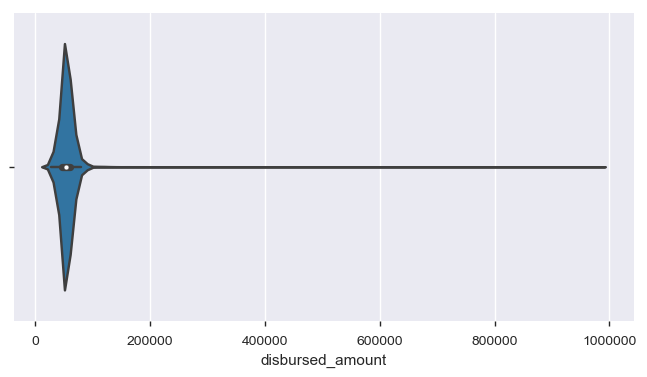

In [108]:
plt.figure(figsize=(8,4))
sns.violinplot(x='disbursed_amount',data=lntTrainData)

 - It is now understood that most of the loans disbursed are within Rs. 1.00 lakh limit. So we may drop the data where disbursed amount is more than Rs. 1.0 lakh. From describe function we also find that mean disbursed is ~Rs. 55000 and STD is ~ Rs. 12000.

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


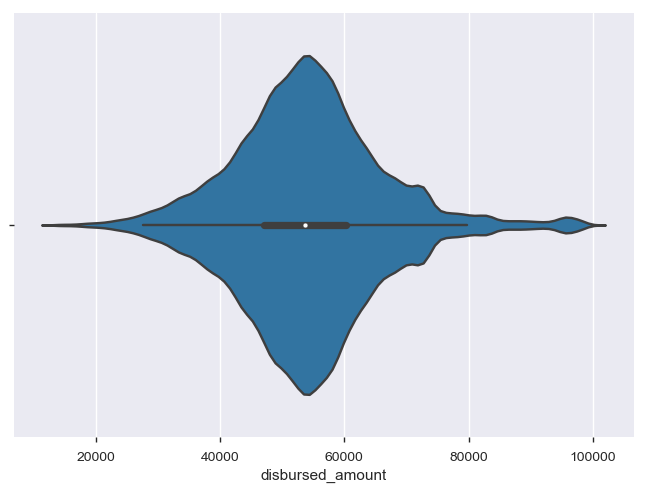

In [109]:
#Dropping outliers - Disbursed Amount more than Rs. 1.00 lakhs
lntTrainData.drop(lntTrainData[lntTrainData.disbursed_amount > 100000].index,inplace=True)
sns.violinplot(x='disbursed_amount',data=lntTrainData)

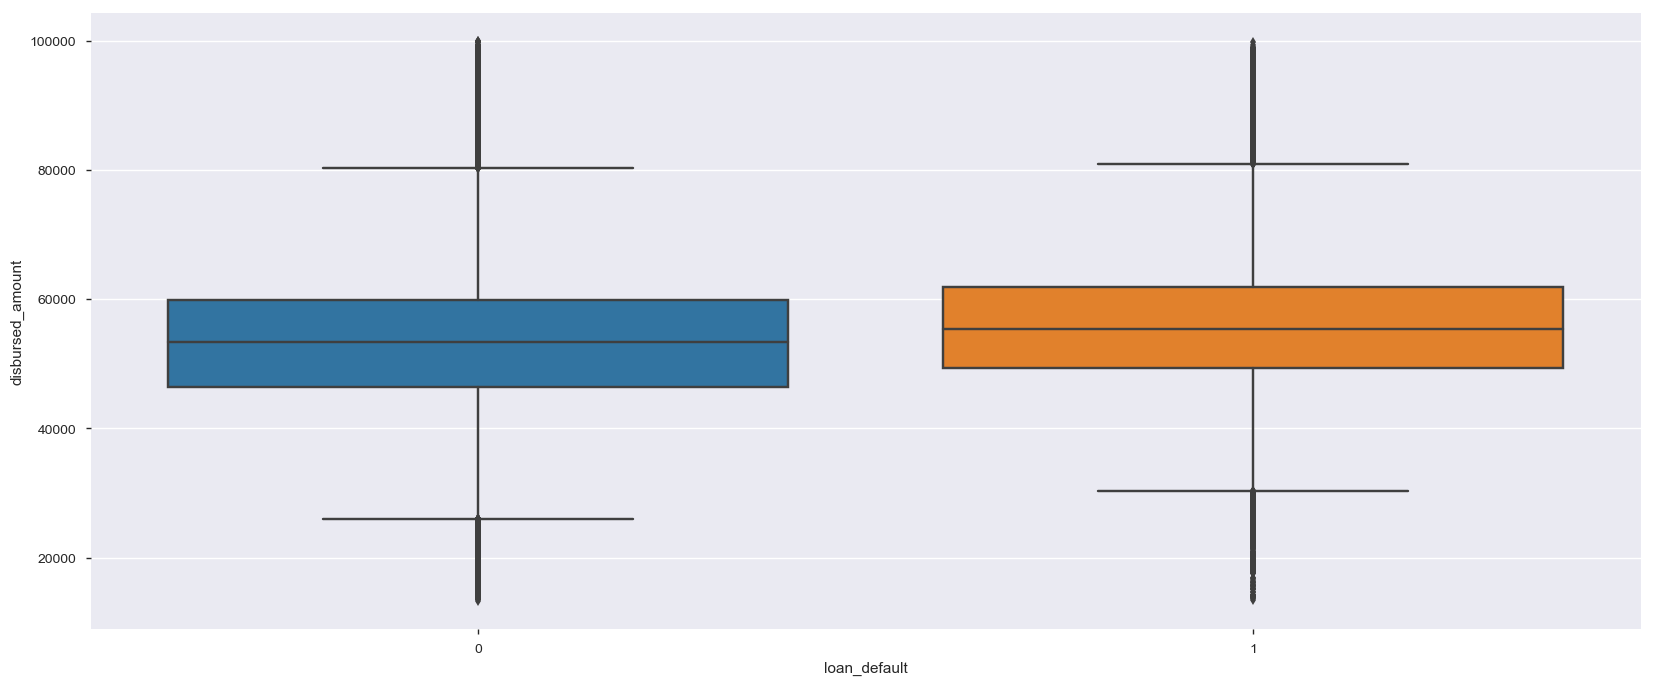

In [110]:
#Again displaying the data using box plot with disbursement amount vs loan default
plt.figure(figsize=(20,8))
sns.boxplot(x = 'loan_default', y='disbursed_amount',data=lntTrainData)

 - Now we see that Loan default is spread across all amounts of disbursements. So disbursement amount is not influencing loan default by a greater way

In [111]:
#We will run describe() after removing the outliers
lntTrainData.describe()

,disbursed_amount,asset_cost,ltv,new_accts_in_last_six_months,delinquent_accts_in_last_six_months,no_of_inquiries,loan_default,cust_age,kyc_score,emptype_Other,emptype_Salaried,emptype_Self employed,risk_High,risk_Low,risk_Medium,risk_No History,risk_Very High,risk_Very Low,total_no_of_accts,total_active_accts,total_overdue_accts,total_current_accts,total_disbursed_amount,total_instal_amt,average_acct_age_mon,credit_history_length_mon
count,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,232319.000000,2.323190e+05,2.323190e+05,2.323190e+05,232319.000000,232319.000000
mean,54106.909409,75484.036523,74.760250,0.380826,0.097319,0.206268,0.217098,35.105708,1.085477,0.032838,0.419897,0.547265,0.051459,0.078164,0.053203,0.557169,0.042545,0.217460,2.495082,1.064743,0.163758,1.703346e+05,2.239811e+05,1.341558e+04,8.903366,16.223537
std,11936.921919,17346.712174,11.467807,0.953711,0.384157,0.706360,0.412271,9.807572,0.284445,0.178214,0.493543,0.497762,0.220933,0.268430,0.224438,0.496722,0.201829,0.412519,5.286993,1.981766,0.564719,9.585558e+05,2.388612e+06,1.524629e+05,15.100437,28.559839
min,13320.000000,37000.000000,10.030000,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,47145.000000,65700.000000,68.880000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,53759.000000,70900.000000,76.840000,0.000000,0.000000,0.000000,0.000000,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,60213.000000,79024.000000,83.690000,0.000000,0.000000,0.000000,0.000000,42.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.700000e+04,6.385700e+04,2.077000e+03,13.000000,24.000000
max,100000.000000,259000.000000,95.000000,35.000000,20.000000,36.000000,1.000000,70.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,2.564281e+07,369.000000,468.000000


In [112]:
sns.set(style='darkgrid')

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


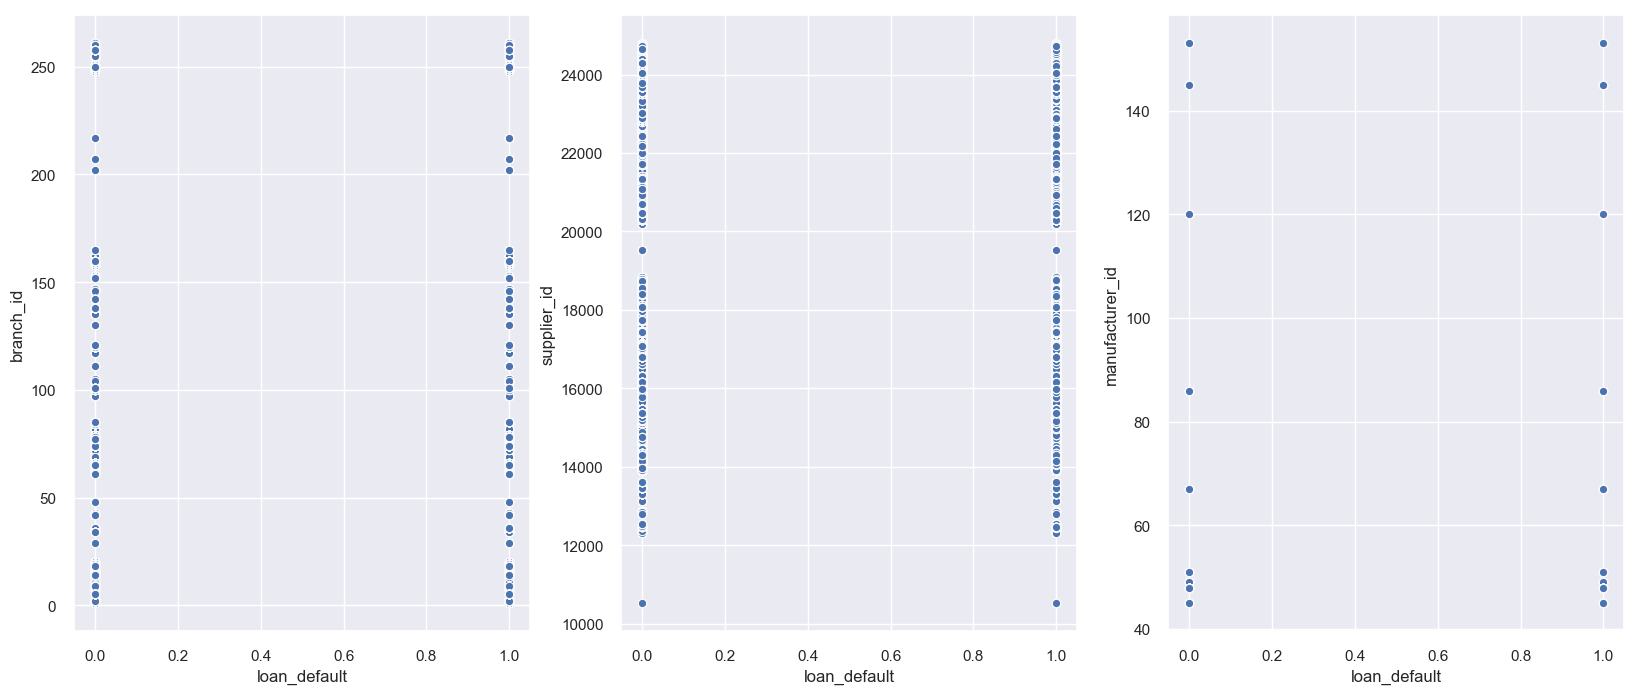

In [113]:
#Plotting loan default against branch, supplier, & manufacturer
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.scatterplot(x='loan_default', y='branch_id', data=lntTrainData, ax=ax[0])
sns.scatterplot(x='loan_default', y='supplier_id', data=lntTrainData, ax=ax[1])
sns.scatterplot(x='loan_default', y='manufacturer_id', data=lntTrainData, ax=ax[2])
fig.show()

 - Branch_id, manufacturer_id & supplier_id are categorical variables having numerical values. from the above graphs we see that loan default is distributed across all the branches, manufacturers & suppliers. So they also are not influencing the default by a greater way.
 - We will decide on dropping these variables after a few more analyses

- From the above chart we can see that default is less in Low Risk Categories such as 1,2 & 3. It is high in No History category 0 and very high in 4 & 5 High Risk categories, particularly for small loan amounts as well. We also see that most of the loans lies in 0 category where no history is available

In [114]:
lntTrainData['loan_default'].value_counts()

0    181883
1     50436
Name: loan_default, dtype: int64

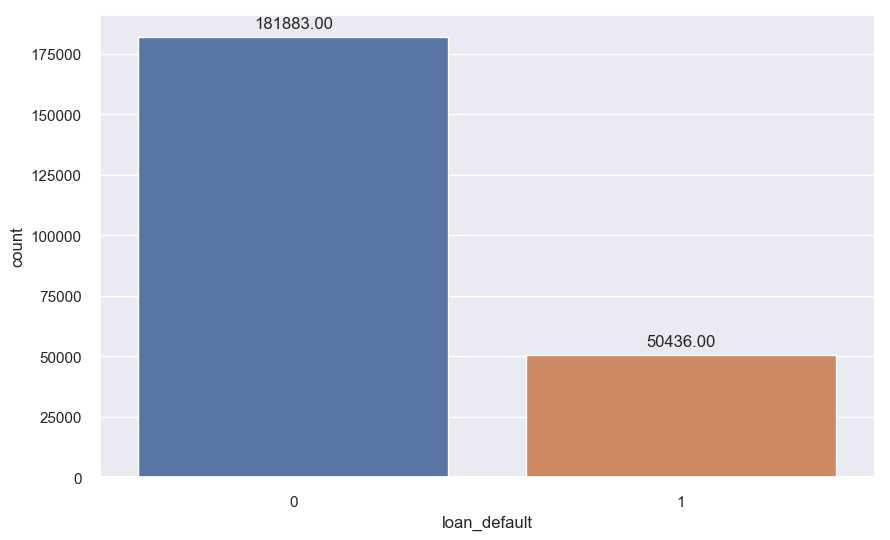

In [115]:
#Plotting Total Loan Default cases in the data set
fig, ax = plt.subplots(figsize=(10,6))
defplot = sns.countplot(data=lntTrainData, x= 'loan_default')
for p in defplot.patches:
    defplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Aprrox. 21% of the values are default. Let us further see what kind of loans went default

In [116]:
lntDefault = lntTrainData[lntTrainData.loan_default == 1]

In [117]:
lntDefault.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50436 entries, 1 to 233128
Data columns (total 30 columns):
disbursed_amount                       50436 non-null int64
asset_cost                             50436 non-null int64
ltv                                    50436 non-null float64
branch_id                              50436 non-null category
supplier_id                            50436 non-null category
manufacturer_id                        50436 non-null category
current_pincode_id                     50436 non-null category
new_accts_in_last_six_months           50436 non-null int64
delinquent_accts_in_last_six_months    50436 non-null int64
no_of_inquiries                        50436 non-null int64
loan_default                           50436 non-null int64
cust_age                               50436 non-null int64
kyc_score                              50436 non-null int32
emptype_Other                          50436 non-null uint8
emptype_Salaried                    

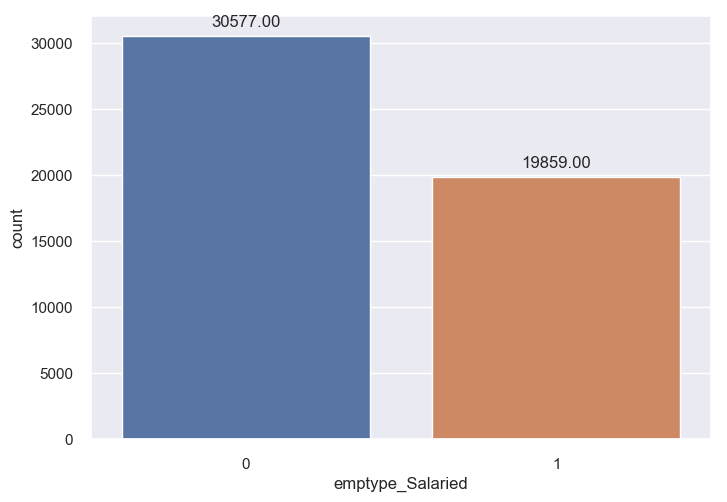

In [118]:
defplot = sns.countplot(data = lntDefault, x='emptype_Salaried')
for p in defplot.patches:
    defplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- Default in salaried class is less when compare to other income group. Approx. ~39%. Even though this is not a deciding factor, employment_type has also an effect on default

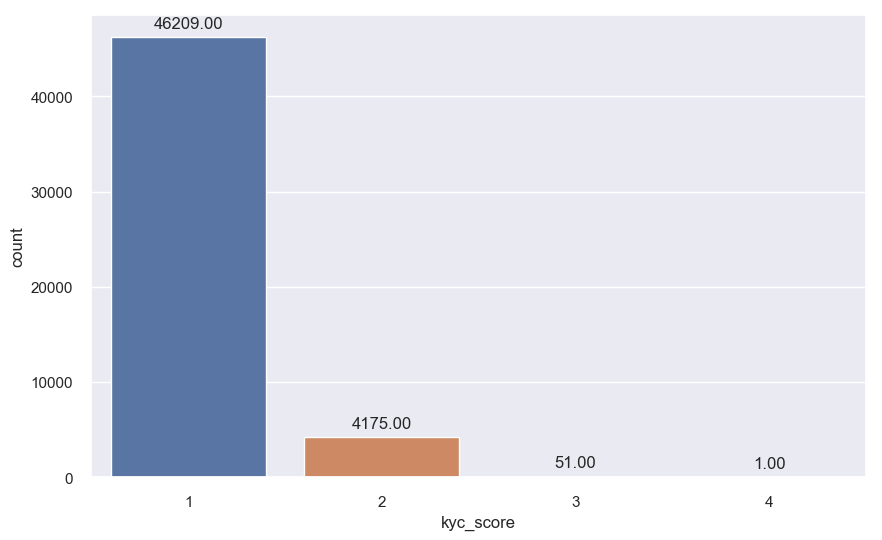

In [119]:
#Plotting loan default data against KYC Score
fig, ax = plt.subplots(figsize=(10,6))
defplot = sns.countplot(data = lntDefault, x='kyc_score')
for p in defplot.patches:
    defplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

- It is very clear that accounts where KYC score is less default is high. KYC score 1 denotes that the customer has given only one ID / Address proof. This is second variable apart from Credit score which directly impacts default.

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(23,0.055,'OOPS Very High!!')

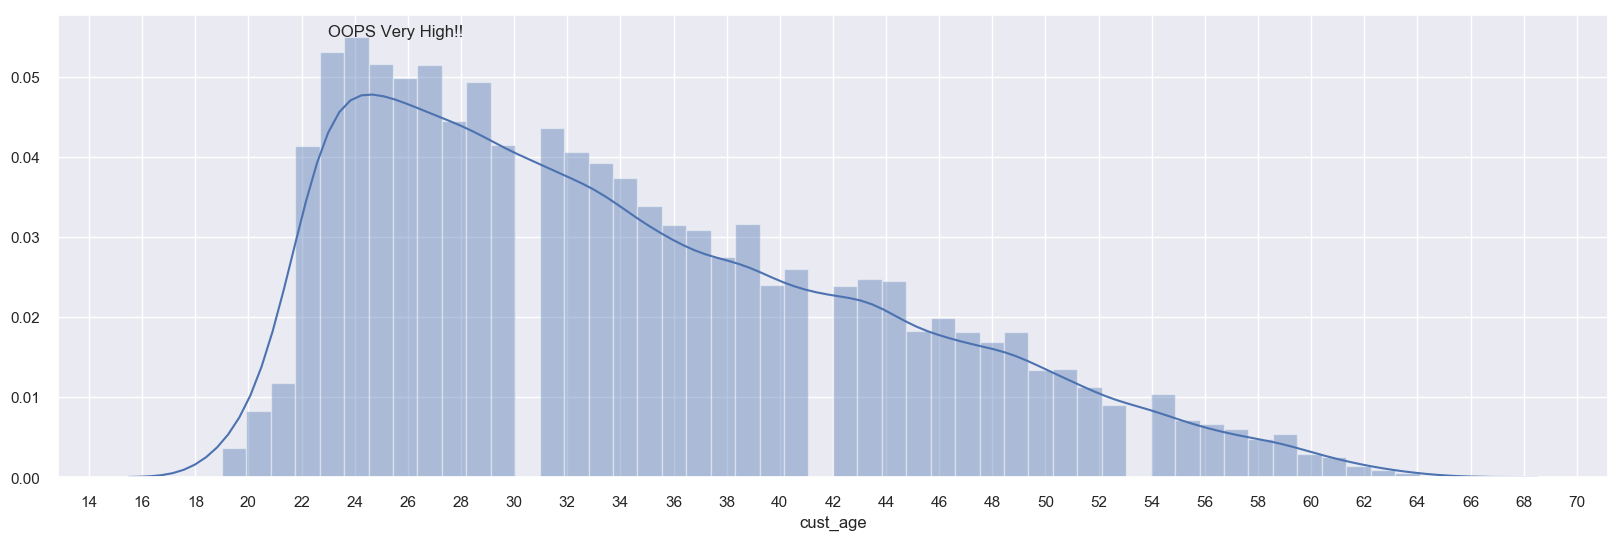

In [120]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20,6))
defplot = sns.distplot(lntDefault.cust_age)
defplot.xaxis.set_major_locator(ticker.MultipleLocator(2))
plt.annotate('OOPS Very High!!',xy=(23,0.055))

- Here we may see that default is very common with customers of young age. It is peak in customers with age 22 & 23. This shows we should be more cautious while lending to this borrower group. This is another parameter influencing default

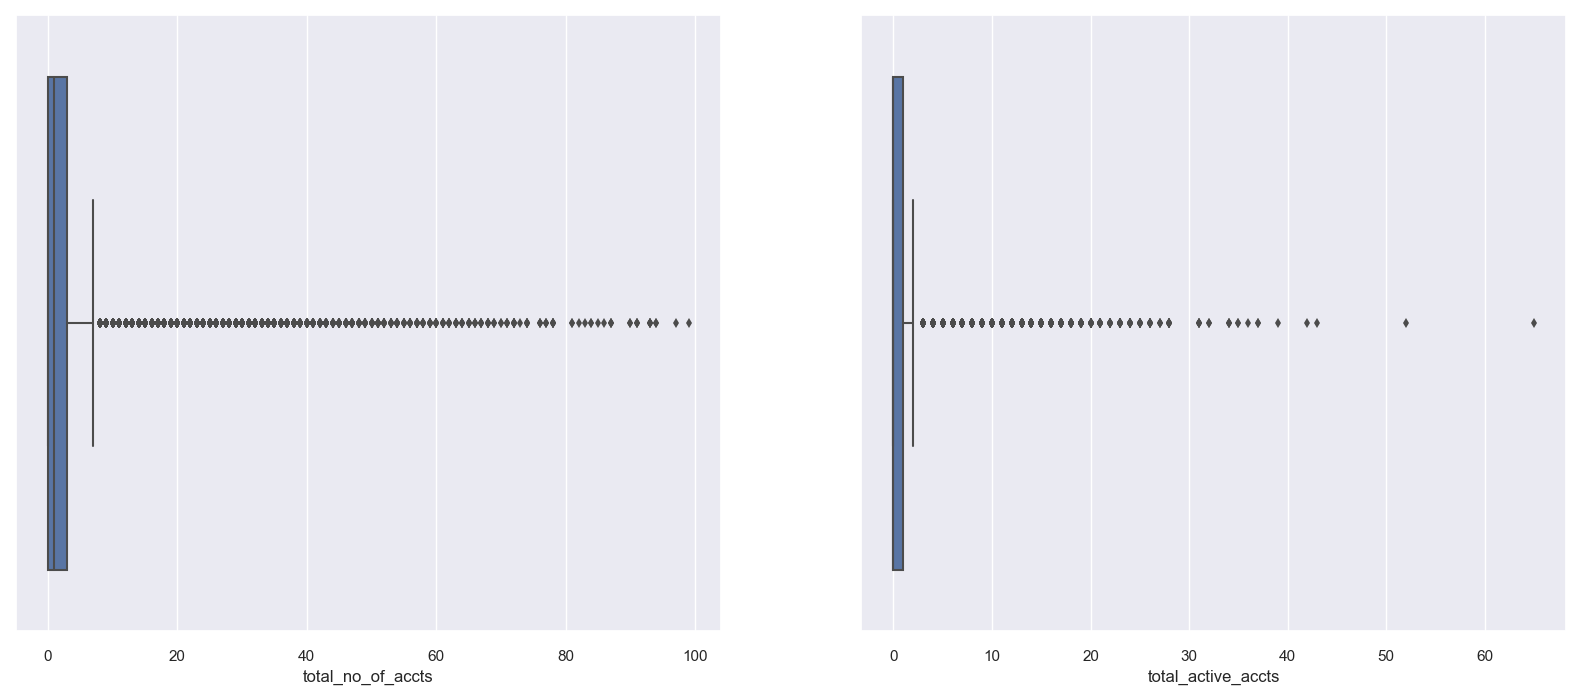

In [121]:
#Analysing Total no of accounts & total no of active accounts
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.boxplot(lntTrainData['total_no_of_accts'][lntTrainData.total_no_of_accts<100], ax=ax[0])
sns.boxplot(lntTrainData['total_active_accts'][lntTrainData.total_active_accts<100], ax=ax[1])

3297


C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


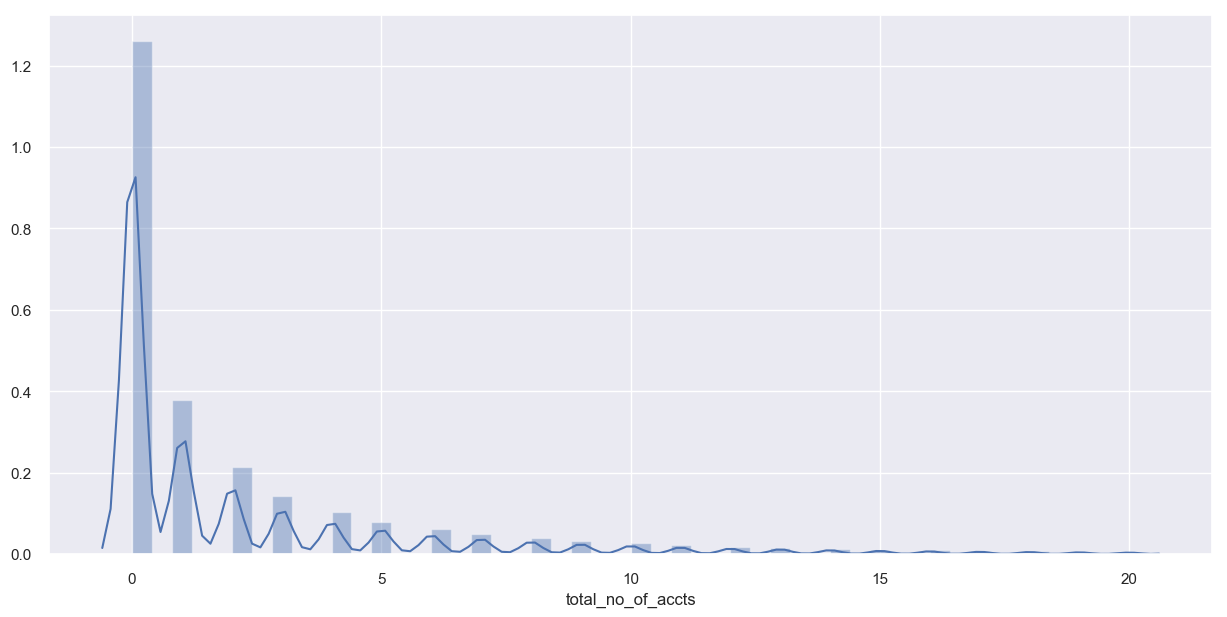

In [122]:
#Lets limit total no. of accounts to 20 only as more than that is seriously dragging the data
print(lntTrainData['loan_default'][lntTrainData.total_no_of_accts > 20].count())
lntTrainData.drop(lntTrainData[lntTrainData.total_no_of_accts > 20].index,inplace=True)
plt.figure(figsize=(15,7))
sns.distplot(lntTrainData['total_no_of_accts'])

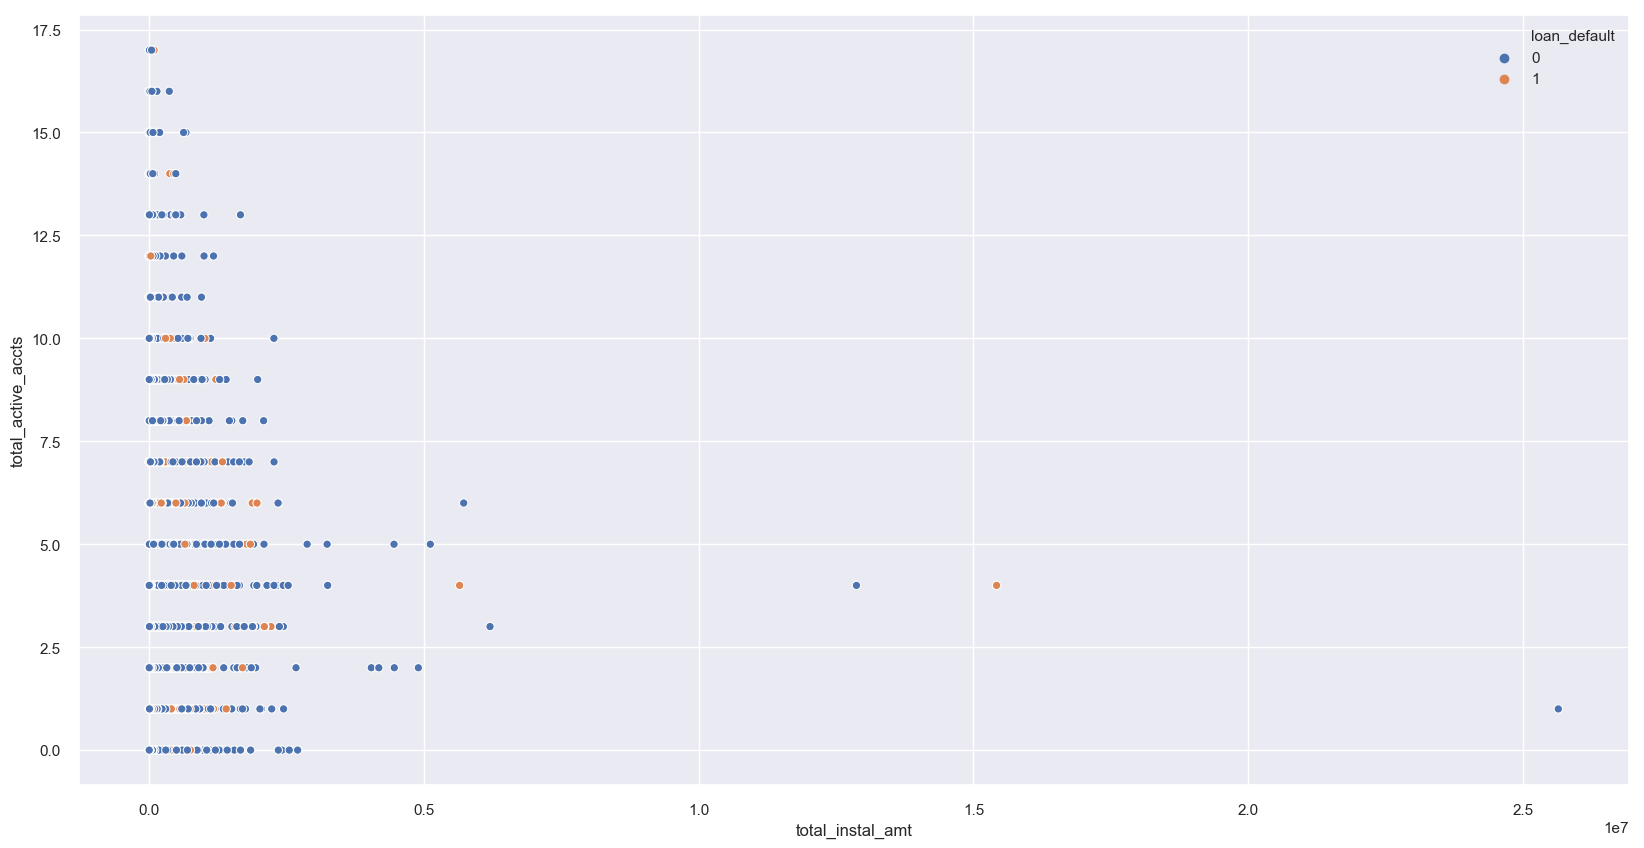

In [123]:
fig, ax = plt.subplots(figsize=(20,10))
defplot = sns.scatterplot(data=lntTrainData, x='total_instal_amt', y='total_active_accts', hue='loan_default')
#defplot.xaxis.set_major_locator(ticker.MultipleLocator(2))

- It is very tough to identify a pattern here. Even though total EMI is less, default persists. So necessary caution to be given, in KYC & Credit Score parameters.

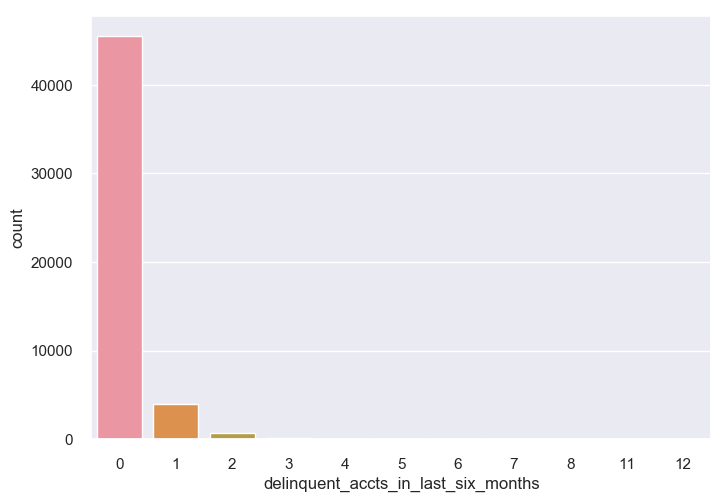

In [124]:
sns.countplot(data=lntDefault, x='delinquent_accts_in_last_six_months')

- It is fairly evident that most of the accounts that has gone default are having No delinquent history.

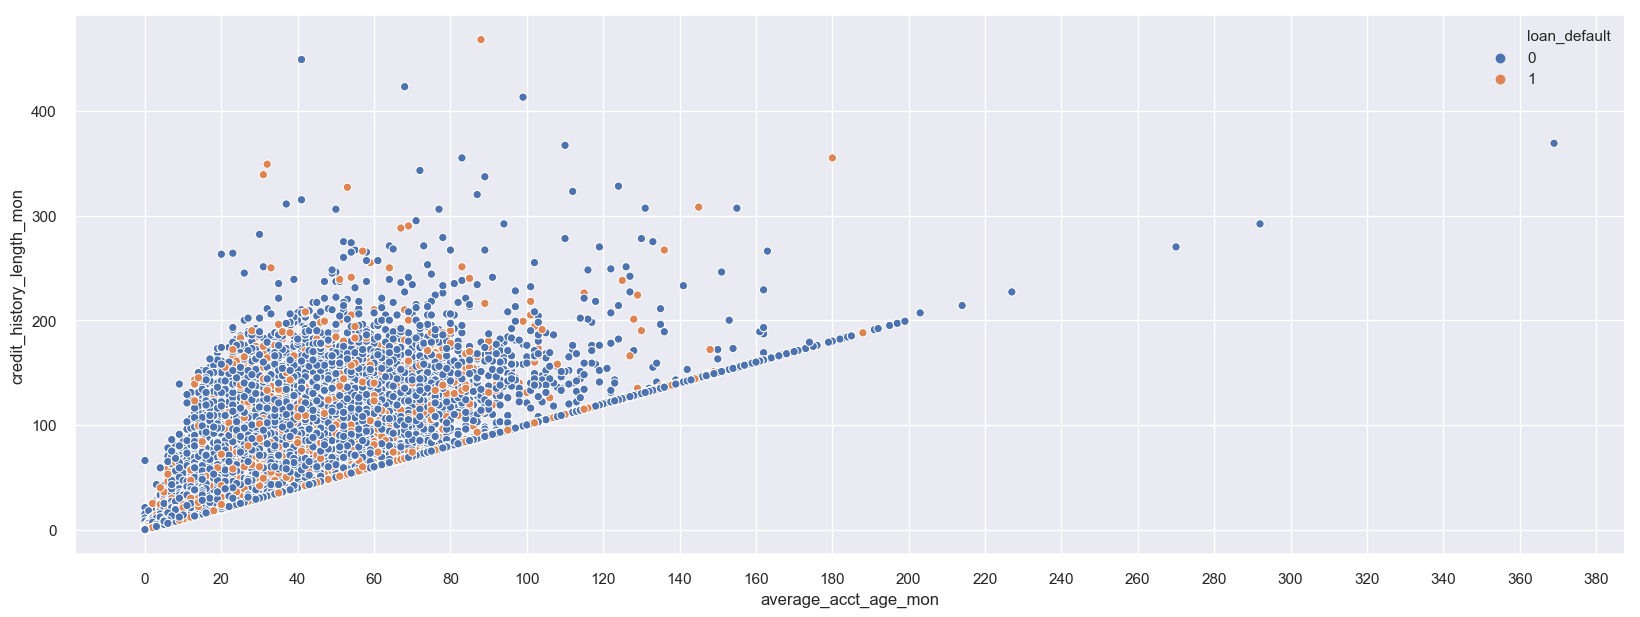

In [125]:
plt.figure(figsize=(20,7))
defplot = sns.scatterplot(data=lntTrainData, x=lntTrainData.average_acct_age_mon, y=lntTrainData.credit_history_length_mon, hue='loan_default')
defplot.xaxis.set_major_locator(ticker.MultipleLocator(20))

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Pair Plot - Loan Default Data')

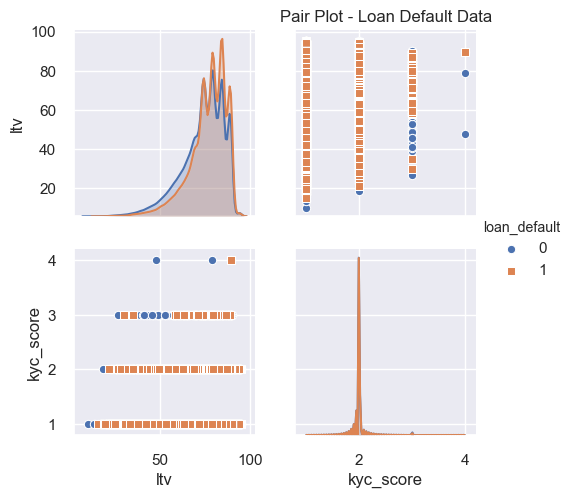

In [126]:
sns.pairplot(lntTrainData, vars=['ltv','kyc_score'], hue='loan_default',markers=['o','s'])
plt.title('Pair Plot - Loan Default Data')

- It is noted that default is high in LTV more than 80%
- Default is more, where KYC score is less than 2 (mostly 1)
- Default is observed high at 2 and less of CNS Score bins

Text(0.5,1,'Heatmap between features')

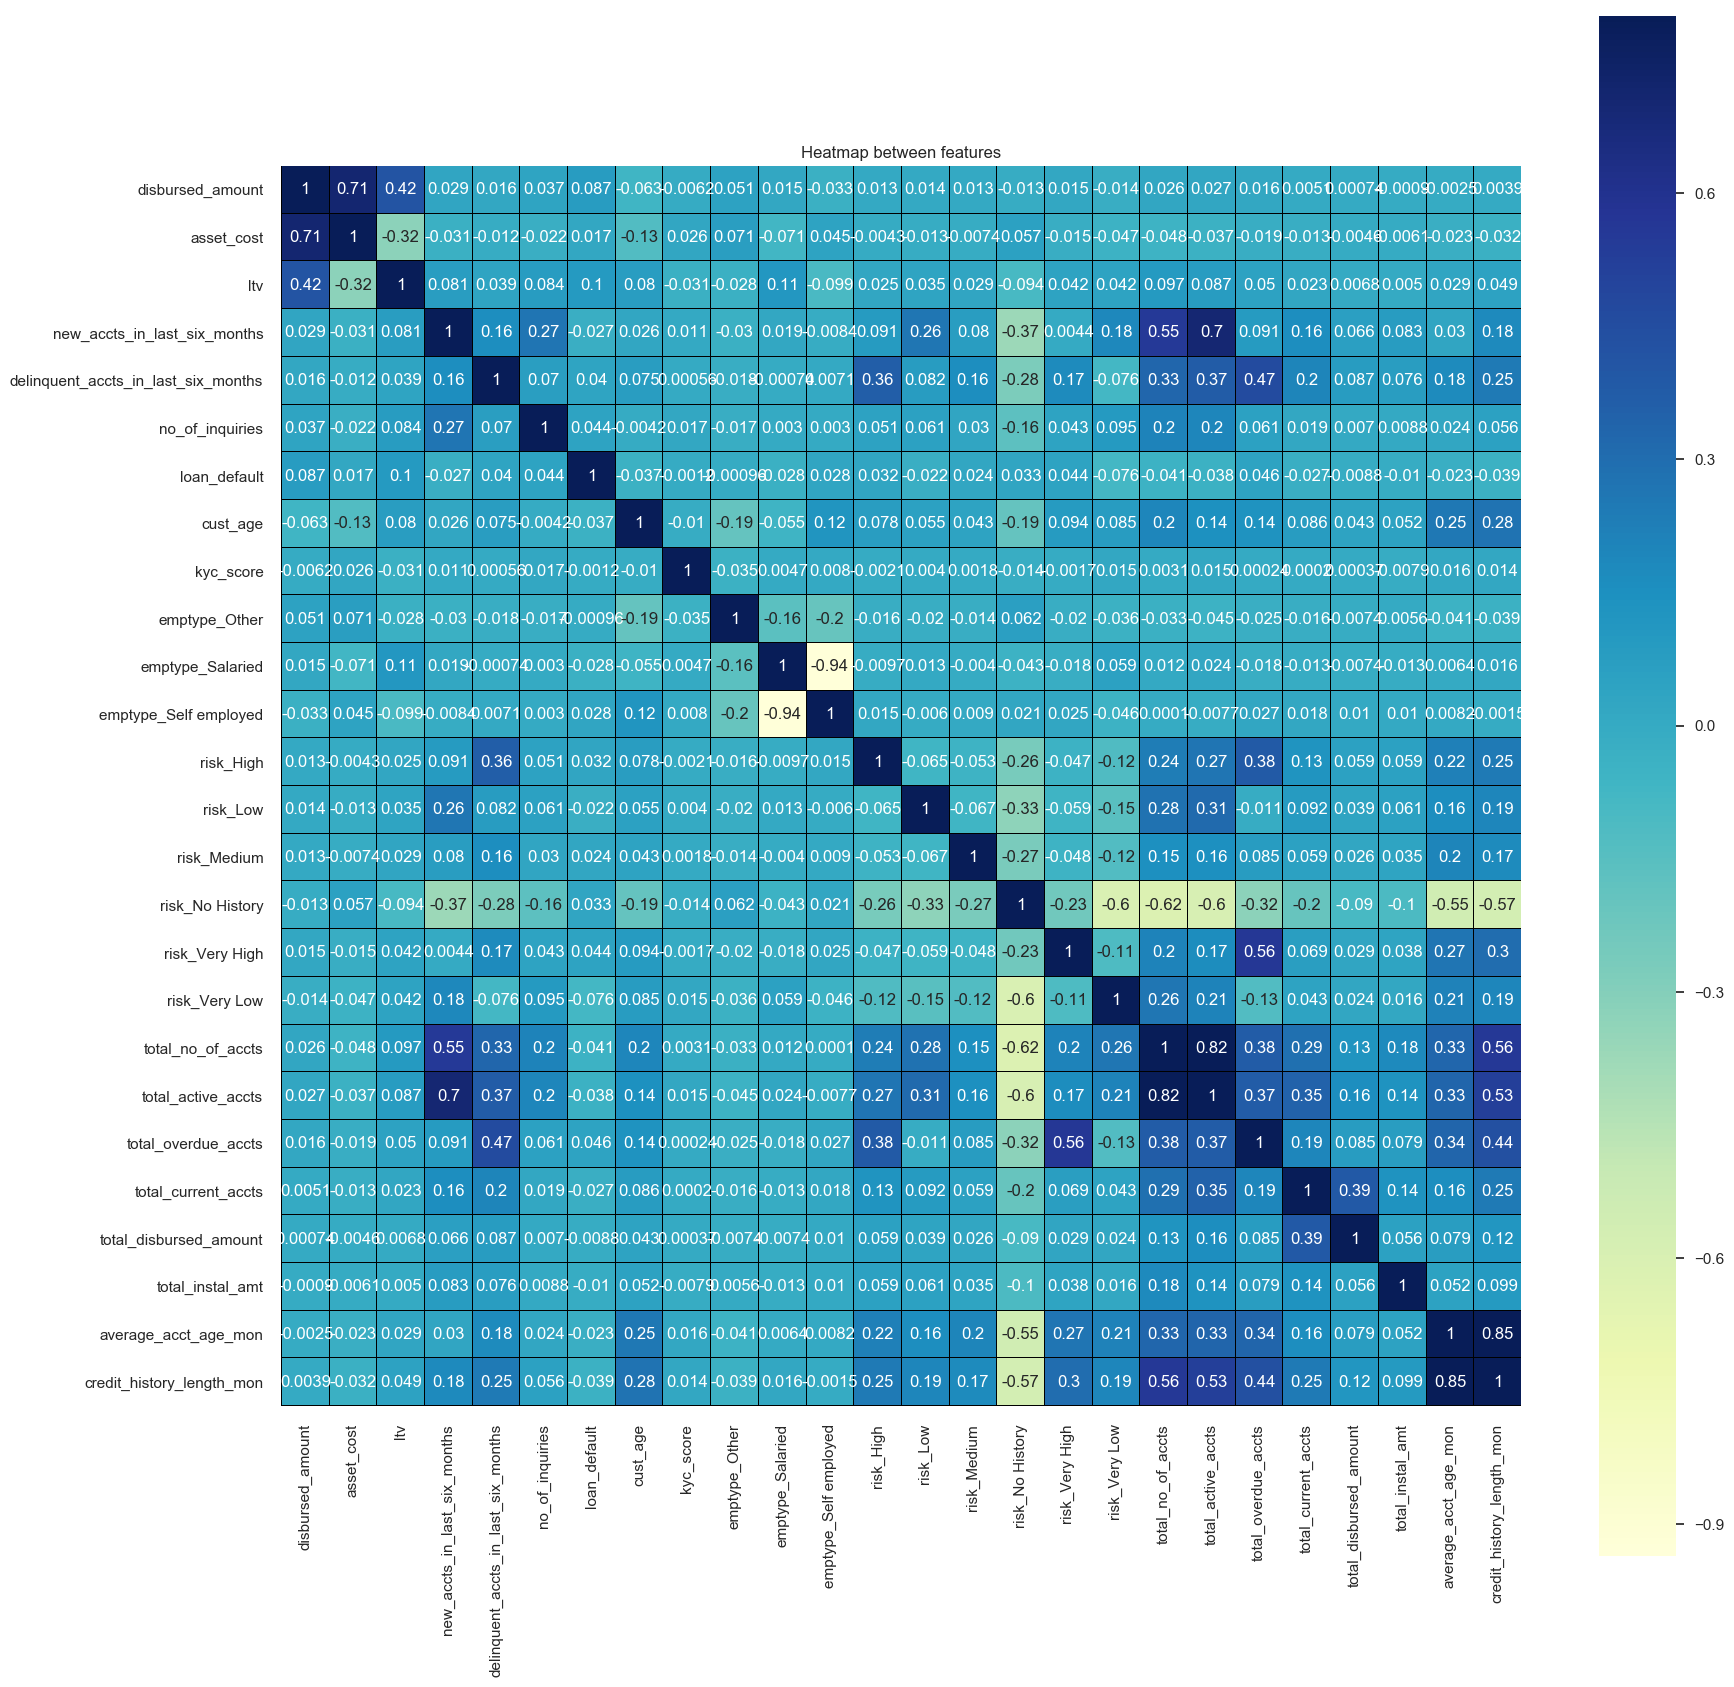

In [127]:
corr = lntTrainData.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidths=.01,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title('Heatmap between features')

- As a cut-off we will have correlation value of 0.6
- We can see that following variables are highly correlated
    - Total_active_accts & new_accts_in_last_six_months (0.7)
    - asset_cost & disbursed_amount (0.71)
    - total_no_of_accts & total_active_accts (0.82)
    - average_acct_age_mon & credit_history_length_mon
- So we may drop total_active_accts, asset_cost & average_acct_age_mon columns and check correlation again

In [128]:
lntTrainData.drop(columns=['total_active_accts','asset_cost','average_acct_age_mon'],axis=1,inplace=True)

In [129]:
len(lntTrainData.columns)

27

In [130]:
#Dropping these features after trying Log Reg. 
#as they are not very significant but I doubt these variables are pulling down prediction accuracy
lntTrainData.drop(columns=['branch_id','supplier_id','manufacturer_id','current_pincode_id','new_accts_in_last_six_months','credit_history_length_mon'],inplace=True,axis=1)

Text(0.5,1,'Heatmap between features - after dropping corr columns')

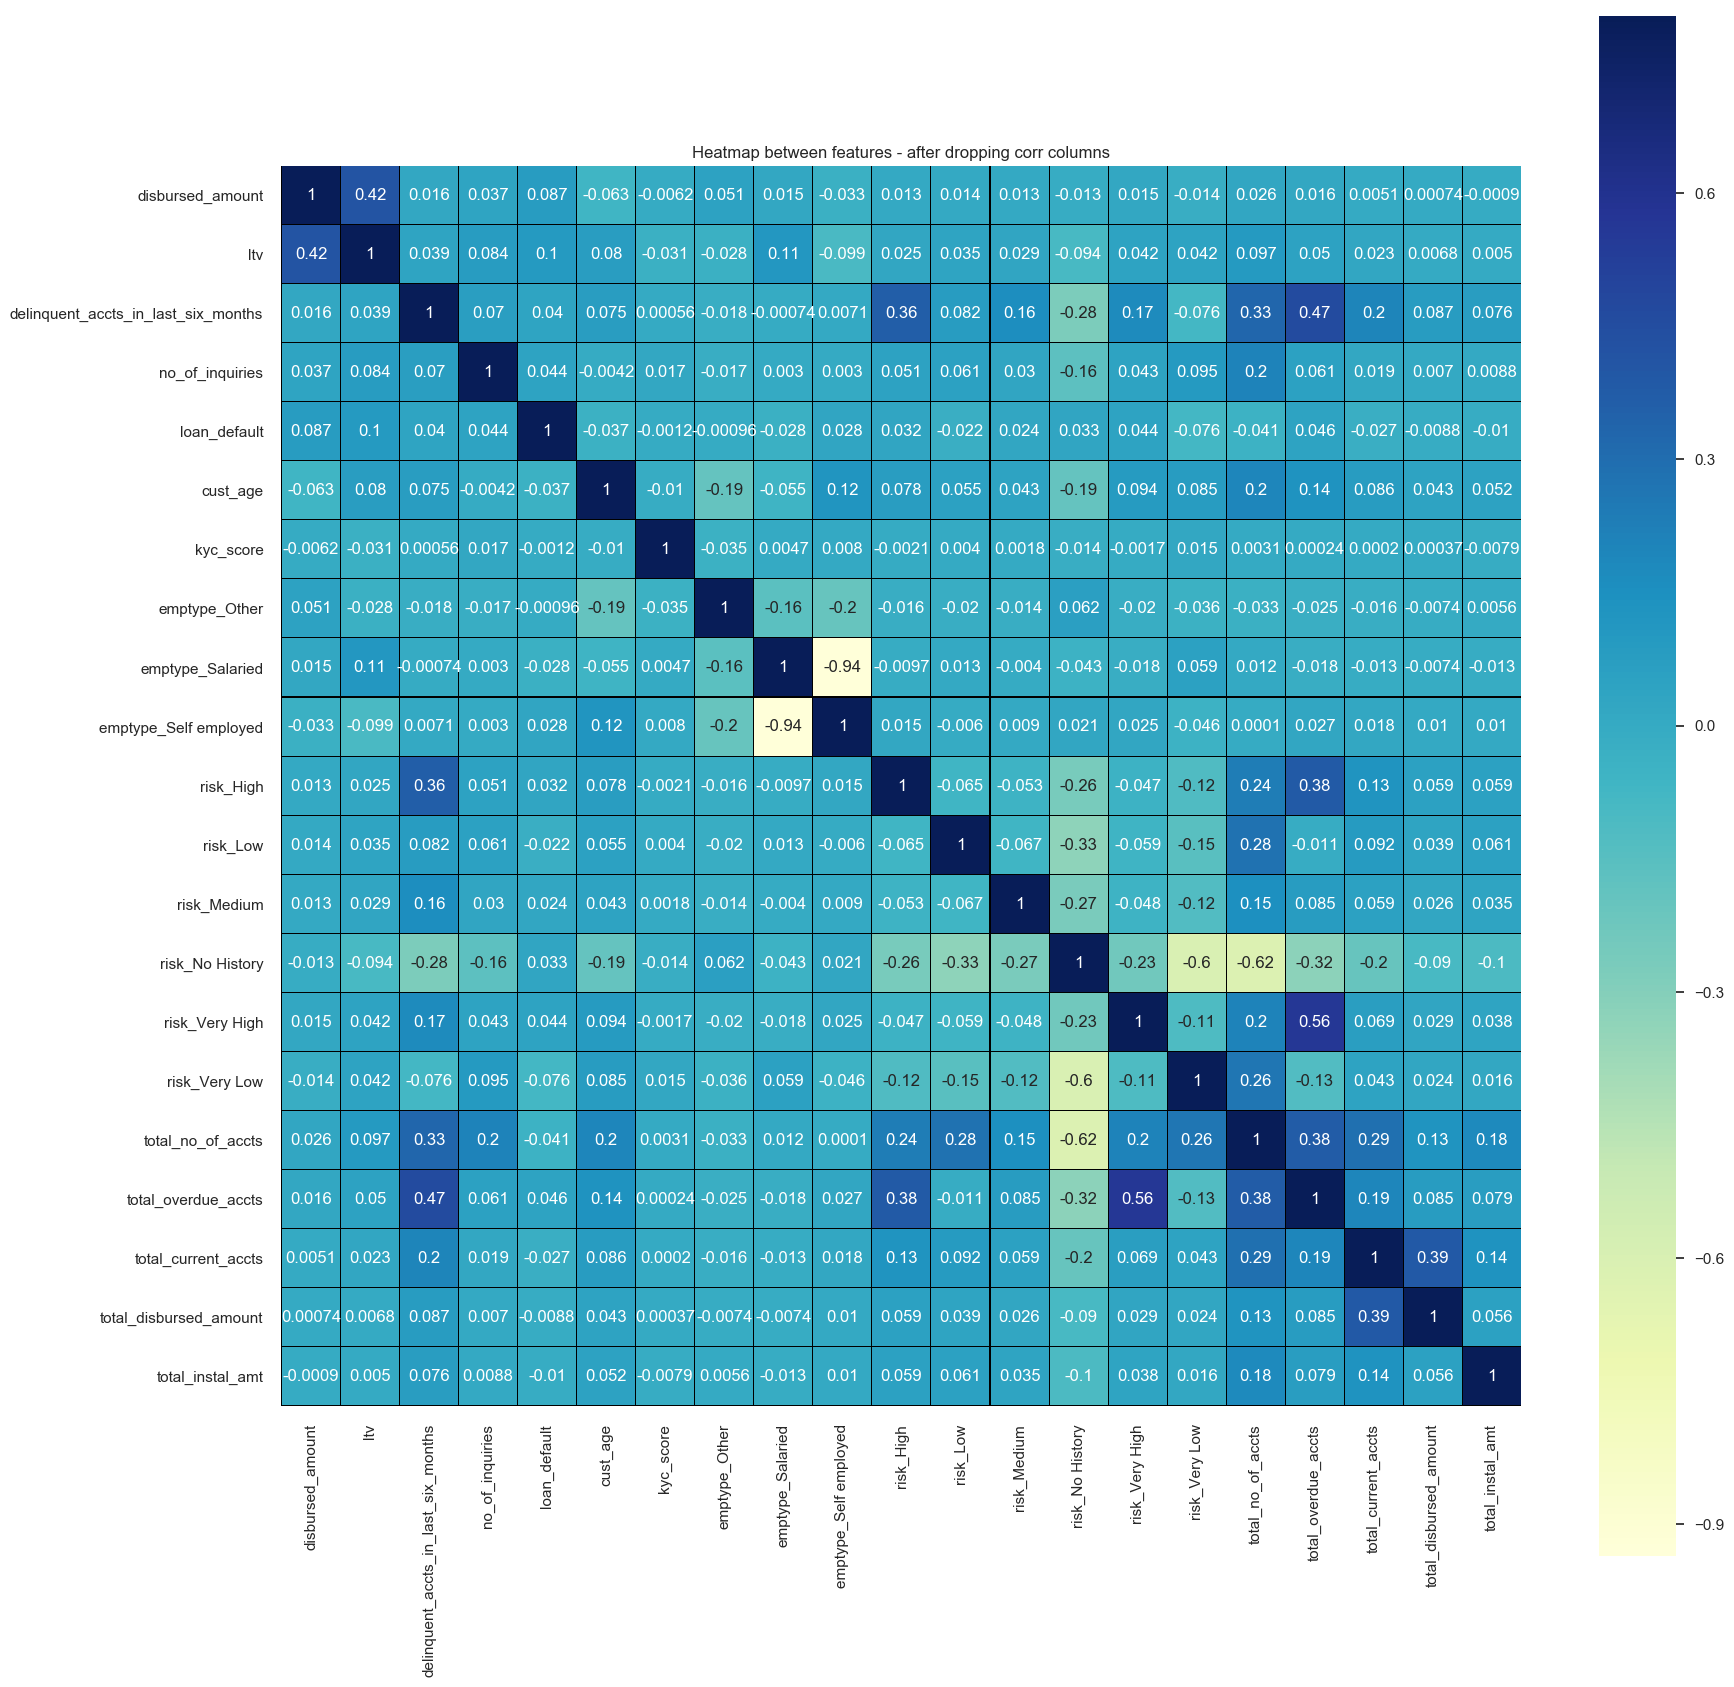

In [131]:
corr = lntTrainData.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidths=.01,square=True,annot=True,cmap='YlGnBu',linecolor='black')
plt.title('Heatmap between features - after dropping corr columns')

### Now let us proceed with Logistic Regression - Acid test for us

#### Standardization of data - Standard scaler

In [132]:
from sklearn.preprocessing import StandardScaler

#### Train, Test split

In [133]:
X, y = lntTrainData.drop('loan_default',axis=1), lntTrainData['loan_default']

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =1)

In [135]:
X_train

,disbursed_amount,ltv,delinquent_accts_in_last_six_months,no_of_inquiries,cust_age,kyc_score,emptype_Other,emptype_Salaried,emptype_Self employed,risk_High,risk_Low,risk_Medium,risk_No History,risk_Very High,risk_Very Low,total_no_of_accts,total_overdue_accts,total_current_accts,total_disbursed_amount,total_instal_amt
77580,41794,63.28,0,0,29,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
103802,59613,84.24,0,0,32,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
70325,46645,74.90,0,0,48,1,0,0,1,0,0,0,0,1,0,5,1,37083,30000,3160
170149,37439,55.23,0,0,33,1,0,1,0,0,0,0,0,0,1,1,0,7920,13200,0
231359,60547,84.96,0,0,25,1,0,1,0,0,0,0,0,0,1,1,0,0,0,689
80504,72023,90.00,1,0,54,1,0,0,1,1,0,0,0,0,0,3,1,302358,300000,0
216386,57403,81.81,0,0,57,1,0,1,0,0,0,0,0,0,1,7,0,503835,1250000,36741
79771,21472,46.42,0,0,24,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
101948,32684,47.35,0,0,34,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
36659,66882,61.61,0,0,26,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [136]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X.columns)

In [137]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160315, 20)
(160315,)
(68707, 20)
(68707,)


#### Performing Logistic Regresssion

In [138]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter= 100, n_jobs=-1,random_state= 42)
logreg.fit(X_train,y_train)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction with Log. Regression

In [139]:
print('Log Reg starts now',dt.now())
starttime = dt.now()

y_pred_trainlog = logreg.predict(X_train)
y_pred_testlog = logreg.predict(X_test)

print('Log Reg ended ',dt.now() - starttime)

Log Reg starts now 2019-10-13 10:58:30.160221
Log Reg ended  0:00:00.027001


#### Model Evaluation

In [140]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testlog))
print('Accuracy score for test data is:', accuracy_score(y_train,y_pred_trainlog))

Accuracy score for test data is: 0.7812304423130103
Accuracy score for test data is: 0.7823410161245049


In [141]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame(confusion_matrix(y_test, y_pred_testlog))

print(confusion_matrix_log)

       0   1
0  53635  47
1  14984  41


In [142]:
confusion_matrix_log.index = ['Actual Standard','Actual Default']
confusion_matrix_log.columns = ['Predicted Standard','Predicted Default']
print("Logistic Regression - ")
print(confusion_matrix_log)
print()
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testlog))

Logistic Regression - 
                 Predicted Standard  Predicted Default
Actual Standard               53635                 47
Actual Default                14984                 41

Accuracy score for test data is: 0.7812304423130103


In [143]:
preds1 = np.where(logreg.predict_proba(X_test)[:,1]> 0.75,1,0)
print('Accuracy score for test data is:', accuracy_score(y_test,preds1))

Accuracy score for test data is: 0.7812886605440493


### Random Forest Try

In [144]:
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime as dt
from sklearn.metrics import roc_curve, auc

In [145]:
n_estimator = [10,20,40,80,100]
train_results = []
test_results = []
for estimator in n_estimator:
    print('RF for estimator ',estimator,' started')
    starttime = dt.now()
    
    rf = RandomForestClassifier(n_estimators=estimator,n_jobs=-1,max_depth=32,min_samples_split=2,min_samples_leaf=1)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    print('RF for estimator ',estimator,' ended')
    print("Time taken for ",estimator,' estimator is',dt.now()-starttime)

RF for estimator  10  started
RF for estimator  10  ended
Time taken for  10  estimator is 0:00:03.923820
RF for estimator  20  started
RF for estimator  20  ended
Time taken for  20  estimator is 0:00:07.414476
RF for estimator  40  started
RF for estimator  40  ended
Time taken for  40  estimator is 0:00:14.228268
RF for estimator  80  started
RF for estimator  80  ended
Time taken for  80  estimator is 0:00:27.343513
RF for estimator  100  started
RF for estimator  100  ended
Time taken for  100  estimator is 0:00:33.283275


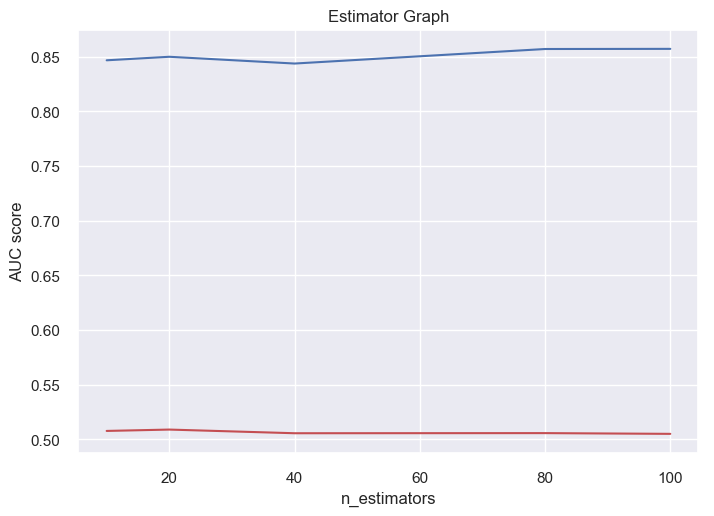

In [146]:
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime as dt
from sklearn.metrics import roc_curve, auc

line1 = plt.plot(n_estimator, train_results, 'b', label= 'Train AUC')
line2 = plt.plot(n_estimator, test_results, 'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.title('Estimator Graph')
plt.xlabel('n_estimators')
plt.show()

In [147]:
#Testing with max_depths
max_depths = np.linspace(1, 32, 32, endpoint=True)

In [148]:
train_results = []
test_results = []
for max_depth in max_depths:
    print('RF for depth ',max_depth,' started')
    starttime = dt.now()
    
    rf = RandomForestClassifier(n_jobs=-1,max_depth=max_depth)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    print('RF for depth ',max_depth,' ended')
    print("Time taken for ",max_depth,' max_depth is',dt.now()-starttime)

RF for depth  1.0  started
RF for depth  1.0  ended
Time taken for  1.0  max_depth is 0:00:00.912301
RF for depth  2.0  started
RF for depth  2.0  ended
Time taken for  2.0  max_depth is 0:00:00.905672
RF for depth  3.0  started
RF for depth  3.0  ended
Time taken for  3.0  max_depth is 0:00:01.139972
RF for depth  4.0  started
RF for depth  4.0  ended
Time taken for  4.0  max_depth is 0:00:01.609995
RF for depth  5.0  started
RF for depth  5.0  ended
Time taken for  5.0  max_depth is 0:00:01.454544
RF for depth  6.0  started
RF for depth  6.0  ended
Time taken for  6.0  max_depth is 0:00:01.398957
RF for depth  7.0  started
RF for depth  7.0  ended
Time taken for  7.0  max_depth is 0:00:01.579333
RF for depth  8.0  started
RF for depth  8.0  ended
Time taken for  8.0  max_depth is 0:00:01.638618
RF for depth  9.0  started
RF for depth  9.0  ended
Time taken for  9.0  max_depth is 0:00:01.811009
RF for depth  10.0  started
RF for depth  10.0  ended
Time taken for  10.0  max_depth is 0:

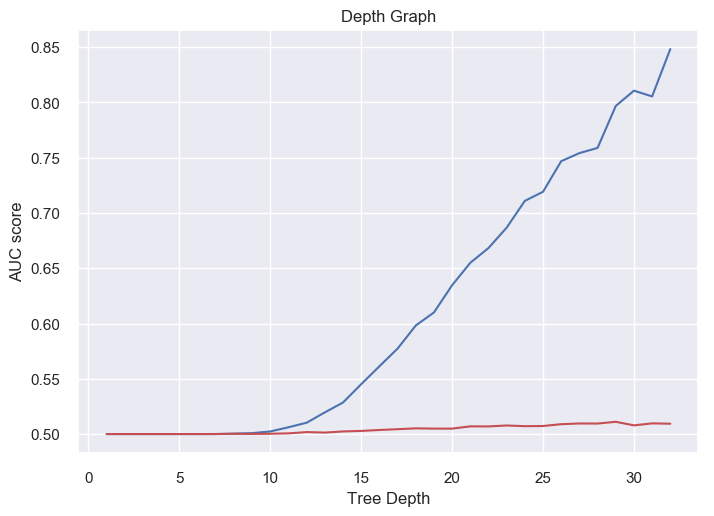

In [149]:
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_depths, train_results, 'b', label= 'Train AUC')
line2 = plt.plot(max_depths, test_results, 'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.title('Depth Graph')
plt.xlabel('Tree Depth')
plt.show()


#### Random Forest Prediction

In [150]:
#Testing with max_depths
min_samples_leafs = np.linspace(0.1,0.5,5,endpoint=True)
min_samples_leafs

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [151]:
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    print('RF for min sample leaf ',min_samples_leaf,' started')
    starttime = dt.now()
    
    rf = RandomForestClassifier(n_jobs=-1,min_samples_leaf=min_samples_leaf,criterion='entropy')
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    print('RF for min sample leaf ',min_samples_leaf,' ended')
    print("Time taken for ",max_depth,' max_depth is',dt.now()-starttime)

RF for min sample leaf  0.1  started
RF for min sample leaf  0.1  ended
Time taken for  32.0  max_depth is 0:00:00.909859
RF for min sample leaf  0.2  started
RF for min sample leaf  0.2  ended
Time taken for  32.0  max_depth is 0:00:00.805942
RF for min sample leaf  0.30000000000000004  started
RF for min sample leaf  0.30000000000000004  ended
Time taken for  32.0  max_depth is 0:00:00.716744
RF for min sample leaf  0.4  started
RF for min sample leaf  0.4  ended
Time taken for  32.0  max_depth is 0:00:00.570853
RF for min sample leaf  0.5  started
RF for min sample leaf  0.5  ended
Time taken for  32.0  max_depth is 0:00:00.698992


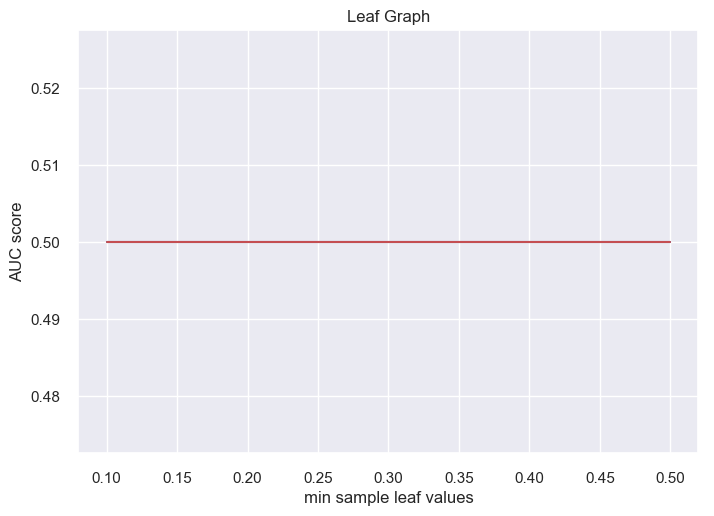

In [152]:
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_leafs, train_results, 'b', label= 'Train AUC')
line2 = plt.plot(min_samples_leafs, test_results, 'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.title('Leaf Graph')
plt.xlabel('min sample leaf values')
plt.show()

In [153]:
#Max_features research
max_features = list(range(1,lntTrainData.shape[1]))
max_features

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [154]:
train_results = []
test_results = []

for max_feature in max_features:
    print('RF for feature ',max_feature,' started')
    starttime = dt.now()
    
    rf = RandomForestClassifier(n_jobs=-1,max_features=max_feature)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    print('RF for min sample leaf ',max_feature,' ended')
    print("Time taken for ",max_feature,' max_depth is',dt.now()-starttime)

RF for feature  1  started
RF for min sample leaf  1  ended
Time taken for  1  max_depth is 0:00:02.869863
RF for feature  2  started
RF for min sample leaf  2  ended
Time taken for  2  max_depth is 0:00:03.172973
RF for feature  3  started
RF for min sample leaf  3  ended
Time taken for  3  max_depth is 0:00:03.358442
RF for feature  4  started
RF for min sample leaf  4  ended
Time taken for  4  max_depth is 0:00:04.002822
RF for feature  5  started
RF for min sample leaf  5  ended
Time taken for  5  max_depth is 0:00:04.070007
RF for feature  6  started
RF for min sample leaf  6  ended
Time taken for  6  max_depth is 0:00:04.459887
RF for feature  7  started
RF for min sample leaf  7  ended
Time taken for  7  max_depth is 0:00:05.673358
RF for feature  8  started
RF for min sample leaf  8  ended
Time taken for  8  max_depth is 0:00:06.394277
RF for feature  9  started
RF for min sample leaf  9  ended
Time taken for  9  max_depth is 0:00:05.650298
RF for feature  10  started
RF for mi

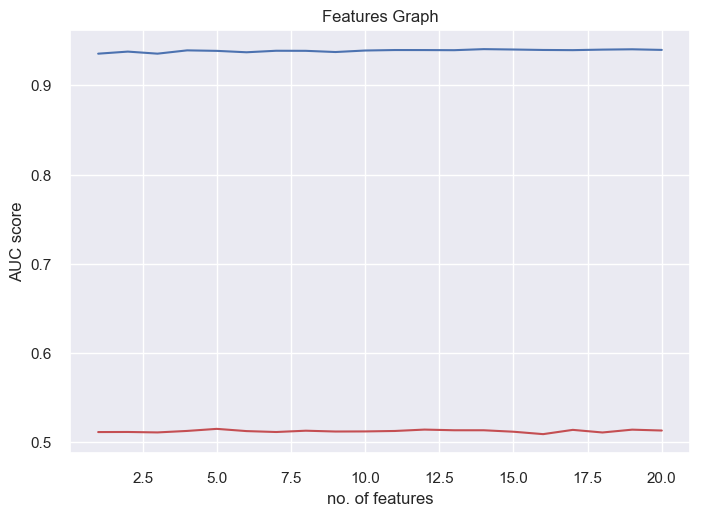

In [155]:
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(max_features, train_results, 'b', label= 'Train AUC')
line2 = plt.plot(max_features, test_results, 'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.title('Features Graph')
plt.xlabel('no. of features')
plt.show()

In [156]:
#Max_features research
min_samples_split = [2, 5, 10, 15, 100]
min_samples_split

[2, 5, 10, 15, 100]

In [157]:
train_results = []
test_results = []

for min_sample_split in min_samples_split:
    print('RF for min sample ',min_sample_split,' started')
    starttime = dt.now()
    
    rf = RandomForestClassifier(n_jobs=-1,min_samples_split=min_sample_split)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rf.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    print('RF for min sample split ',min_sample_split,' ended')
    print("Time taken for ",min_sample_split,' min sample is',dt.now()-starttime)

RF for min sample  2  started
RF for min sample split  2  ended
Time taken for  2  min sample is 0:00:03.716019
RF for min sample  5  started
RF for min sample split  5  ended
Time taken for  5  min sample is 0:00:03.578613
RF for min sample  10  started
RF for min sample split  10  ended
Time taken for  10  min sample is 0:00:03.462113
RF for min sample  15  started
RF for min sample split  15  ended
Time taken for  15  min sample is 0:00:03.601664
RF for min sample  100  started
RF for min sample split  100  ended
Time taken for  100  min sample is 0:00:02.834755


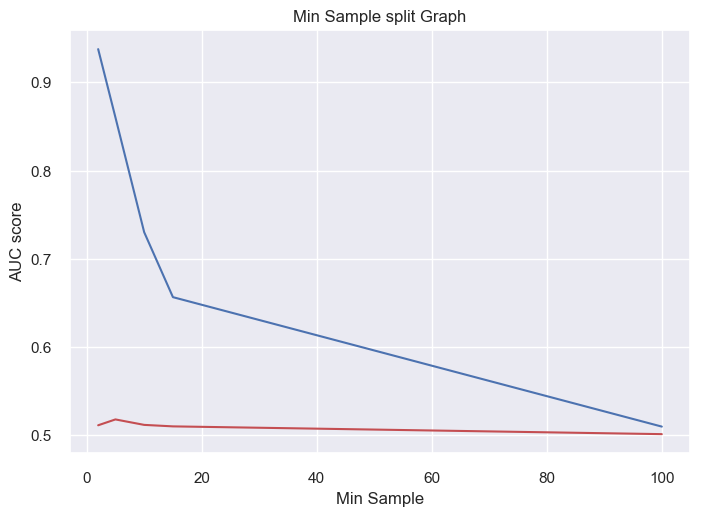

In [158]:
from matplotlib.legend_handler import HandlerLine2D

line1 = plt.plot(min_samples_split, train_results, 'b', label= 'Train AUC')
line2 = plt.plot(min_samples_split, test_results, 'r', label= 'Test AUC')

plt.ylabel('AUC score')
plt.title('Min Sample split Graph')
plt.xlabel('Min Sample')
plt.show()

### Decision Tree try

In [160]:
from sklearn import tree
from sklearn.metrics import accuracy_score
min_weight_fraction_leafs = [0.0,0.1,0.2,0.3,0.4,0.5]

for min_weight_fraction_leaf in min_weight_fraction_leafs:
    model_tree = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf= 1,max_leaf_nodes= None,
                                             min_weight_fraction_leaf= 0.0,
                                             splitter= 'best',criterion='gini', max_depth= 80,
                                             max_features= 10, min_samples_split = 2 )
    model_tree.fit(X_train, y_train)

    y_pred_testtree = model_tree.predict(X_test)

    print('For min_weight_fraction_leaf ',min_weight_fraction_leaf,' accuracy score for test data is:', 
          accuracy_score(y_test,y_pred_testtree))

For min_weight_fraction_leaf  0.0  accuracy score for test data is: 0.6355829828110673
For min_weight_fraction_leaf  0.1  accuracy score for test data is: 0.6355829828110673
For min_weight_fraction_leaf  0.2  accuracy score for test data is: 0.6355829828110673
For min_weight_fraction_leaf  0.3  accuracy score for test data is: 0.6355829828110673
For min_weight_fraction_leaf  0.4  accuracy score for test data is: 0.6355829828110673
For min_weight_fraction_leaf  0.5  accuracy score for test data is: 0.6355829828110673


In [ ]:
#max_depth is taken as 80 - accuracy score is 0.6578951198567832
# Gini is selected as criterion
# max_feature is selected as 10 
# min_samples_split is kept as 2
#min_sample_leaf is 1
# max_leaf_node is None


In [161]:
dt_model = tree.DecisionTreeClassifier(random_state = 2,min_samples_leaf= 1,max_leaf_nodes= None,
                                             min_weight_fraction_leaf= 0.0,
                                             splitter= 'best',criterion='gini', max_depth= 80,
                                             max_features= 10, min_samples_split = 2 )
dt_model.fit(X_train, y_train)

y_pred_testtree = dt_model.predict(X_test)

print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testtree))

Accuracy score for test data is: 0.6355829828110673


In [162]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_testtree)
roc_auc = auc(false_positive_rate,true_positive_rate)

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix_tree = pd.DataFrame(confusion_matrix(y_test, y_pred_testtree))
confusion_matrix_tree.index = ['Actual Standard','Actual Default']
confusion_matrix_tree.columns = ['Predicted Standard','Predicted Default']
print("Decision Tree - ")
print(confusion_matrix_tree)

print()
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testtree))

Decision Tree - 
                 Predicted Standard  Predicted Default
Actual Standard               39012              14670
Actual Default                10368               4657

Accuracy score for test data is: 0.6355829828110673


#### Decision Tree with Grid Search CV

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime as dt

#dt_1 = DecisionTreeClassifier()

#sample_split_range = list(range(2,50))

tree_para = [{'criterion':['gini']}]
              #'min_samples_split' : [49], 'max_depth': list(range(1,10)),'max_leaf_nodes' : list(range(2,10))}]

grid_search_tree = GridSearchCV(dt_model,tree_para,cv=10, scoring='accuracy')

In [166]:
print('Grid Search CV started',dt.now())
starttime = dt.now()

grid_results = grid_search_tree.fit(X_train, y_train)

print('Grid Search CV ended. Total Time', dt.now()- starttime)

Grid Search CV started 2019-10-13 17:41:53.137513
Grid Search CV ended. Total Time 0:00:19.521029


In [ ]:
print(grid_search_tree.best_params_)
print(grid_results.best_estimator_)
print(grid_results.best_score_)

In [ ]:
print('Grid Search CV prediction starts', dt.now())
starttime = dt.now()

y_pred_testtree1 = grid_results.predict(X_test)

print('Grid Search CV prediction starts ended. Total Time', dt.now()- starttime)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testtree1))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_testtree1))

print(confusion_matrix)

### All these below - tried & didn't succeed

#### Random Forest without Specs

rf_classifier = RandomForestClassifier(random_state = 0,n_estimators =50)
rf_classifier.fit(X_train, y_train)

rf_cla.get_params

y_pred_trainrand1 = model1.predict(X_train)
y_pred_testrand1 = model1.predict(X_test)
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_testrand1))

from sklearn.metrics import confusion_matrix
confusion_matrix_rf1 = pd.DataFrame(confusion_matrix(y_test, y_pred_testrand1))

print(confusion_matrix_rf1)

print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_train,y_pred_trainrand1))


print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_testrand))

from sklearn.metrics import confusion_matrix
confusion_matrix_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_testrand))
confusion_matrix_rf.index = ['Actual Standard','Actual Default']
confusion_matrix_rf.columns = ['Predicted Standard','Predicted Default']
print("Rand Forest - ")
print(confusion_matrix_rf)

print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_testrand))

from sklearn.metrics import confusion_matrix
confusion_matrix_trainrand = pd.DataFrame(confusion_matrix(y_train, y_pred_trainrand1))

print(confusion_matrix_trainrand)

#### Random Search CV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform, truncnorm
# parameters for GridSearchCV
# specify parameters and distributions to sample from

rf = RandomForestClassifier()

model_params = {    
    'n_estimators': randint(4,200),    
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),    
    'min_samples_split': uniform(0.01, 0.199)
}

n_iter_search = 250

random_search = RandomizedSearchCV(param_distributions= model_params,random_state=42, estimator= rf, cv = 5,
                                   n_iter = n_iter_search, n_jobs = 1)

model_params

print('Random Search CV start now')
starttime = dt.now()

random_search.fit(X_train, y_train)

print('Time Taken for Random Search CV is ',dt.now() - starttime)

from pprint import pprint
pprint(random_search.best_estimator_.get_params())

best_param = {'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.3147684836133933,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.020451879421737748,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 173,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

print('Prediction starts')
starttime = dt.now()

y_pred_testrandcv = random_search.predict(X_test)

print('Rand Search CV prediction ended. Time Taken ',dt.now()-starttime)

from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_testrandcv))

from sklearn.metrics import confusion_matrix
confusion_matrix_rand = pd.DataFrame(confusion_matrix(y_test, y_pred_testrandcv))

print(confusion_matrix_rand)

### Light GBM Model - Try

import lightgbm as lgb

def run_lgb(X_train, X_test, y_train, y_test, test_df):
    params = {
        "objective" : "binary",
       "n_estimators":10000, # changed from 20000
       "reg_alpha" :0.5005020213127344,
       "reg_lambda":0.45121616279208887, # changed from 0.3
       'lambda_l2':0.6, # changed from 0.6
        'lambda_l1':0.5,
      # "n_jobs":-1,
       "colsample_bytree":0.8970523178797932, #changed from 0.8
       "min_child_weight":0.99,
       #"subsample_for_bin":200,
       "min_data_in_leaf":256, #changed form 100
       #"nthread":4,
       "metric" : "auc",
       "num_leaves" :256,  #best upto now 128
       "learning_rate" :0.02,  #changed from 0.001
       #"verbosity" : -1,
       #"seed": 120,
       "max_bin":250, #changed from 200
       'max_depth':3, # changed from 7
       'min_gain_to_split':0.2, #Changed from 0.09
       #'scale_pos_weight':8, #Changed from 3
       'bagging_fraction':0.88, #changed from 0.8
       'feature_fraction':0.99,
        #'tree_learner':'voting'
        'class_weight':'balanced',
        'min_sum_hessian_in_leaf':0.3,
        'cegb_penalty_split':0.3,
        'min_data_in_bin':60,
        'bin_construct_sample_cnt':400000,
        'is_unbalance':'true'
        
    }
    
    lgtrain = lgb.Dataset(X_train, label=y_train)
    lgval = lgb.Dataset(X_test, label=y_test)
    evals_result = {}
    model = lgb.train(params, lgtrain, 10000, 
                      valid_sets=[lgtrain, lgval], 
                      early_stopping_rounds=100, 
                      verbose_eval=50, 
                      evals_result=evals_result)
    pred_test_y = model.predict(test_df, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

pred_test, model, evals_result = run_lgb(X_train, X_test, y_train, y_test, X_test)
print("LightGBM Training Completed...")

#Converting y_pred values to binary
for i in range(0,len(y_pred_testlgb)):
    if y_pred_testlgb[i]>=.5:       # setting threshold to .5
        y_pred_testlgb[i]=1
    else:  
        y_pred_testlgb[i]=0

from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_testlgb))

from sklearn.metrics import confusion_matrix
confusion_matrix_lgb = pd.DataFrame(confusion_matrix(y_test, y_pred_testlgb))

print(confusion_matrix_lgb)

y_pred_testlgb.max()

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

param_grid = {'C': [0.1,1, 10, 100, 1000]}

model = SVC()
model.fit(X_train,y_train)
y_pred_svc = model.predict(X_test)
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

#Find the best 'C' value
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.best_params_
c_val = grid.best_estimator_.C

#Then you can re-run predictions on this grid object just like you would with a normal model.
grid_predictions = grid.predict(X_test)

#use the best 'C' value found by GridSearch and reload your LogisticRegression module
logmodel = LogisticRegression(C=c_val)
logmodel.fit(X_train,y_train)

print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

#### Randomized Search using a small sample of data - to reduce runtime

lntSmallData = lntTrainData[:10000]

lntSmallData

X, y = lntSmallData.drop('loan_default',axis=1), lntSmallData['loan_default']

print(X.shape)
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =1)
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": range(2,5),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search

model = RandomForestClassifier(random_state = 0)

random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = 20,
                                   n_jobs = -1)
random_search.fit(X_train, y_train)

y_pred_rfsmall = random_search.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_rfsmall))

from sklearn.metrics import confusion_matrix

confusion_matrix_rfsmall = pd.DataFrame(confusion_matrix(y_test, y_pred_rfsmall))

confusion_matrix_rfsmall.index = ['Actual Died','Actual Survived']
confusion_matrix_rfsmall.columns = ['Predicted Died','Predicted Survived']
print(confusion_matrix_rfsmall)